In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
import cv2

import os
import random

In [ ]:
dose = np.load(r"C:\Users\peter\Documents\Thesis\dose_estimator-git\data\data_filtered\numpy\dose_train.npy")
pet = np.load(r"C:\Users\peter\Documents\Thesis\dose_estimator-git\data\data_filtered\numpy\pet_train.npy")
ct = np.load(r"C:\Users\peter\Documents\Thesis\dose_estimator-git\data\data_filtered\numpy\ct_train.npy")

In [2]:
dose = np.load('/home/peter/Documents/dose_estimator-git/data/data_corrected/numpy/dose_train.npy')
pet = np.load('/home/peter/Documents/dose_estimator-git/data/data_corrected/numpy/pet_train.npy')
ct = np.load('/home/peter/Documents/dose_estimator-git/data/data_corrected/numpy/ct_train.npy')

In [3]:
dose.shape

(2533, 128, 128)

In [37]:
for x in range(0, 100):
    #print(pet[x].mean())
    #print(dose[x].mean())
    print(ct[x].min())
    print(ct[x].max())
    print(pet[x].min())
    print(pet[x].max())
    print(dose[x].min())
    print(dose[x].max())
    print(" ")

-1023.996826171875
-1020.7155151367188
0.0
7.247761249542236
0.0
0.008565263822674751
 
-1023.996826171875
-969.901611328125
0.0
5.3515305519104
0.0
0.007534259930253029
 
-1023.996826171875
-951.713623046875
0.0
2.08274507522583
0.0
0.011407134123146534
 
-1023.996826171875
-870.1488647460938
0.0
2.5681607723236084
0.0
0.013839246705174446
 
-1023.996826171875
157.6918182373047
0.0
11.764759063720703
0.0
0.010468656197190285
 
-1023.996826171875
299.1957092285156
0.0
7.109070777893066
0.0
0.011446787975728512
 
-1023.996826171875
264.78851318359375
0.0
16.169370651245117
0.0
0.02475731447339058
 
-1023.996826171875
260.72589111328125
0.0
25.303796768188477
0.0
0.03946894779801369
 
-1023.996826171875
460.88763427734375
0.0
30.409032821655273
0.0
0.046130821108818054
 
-1023.996826171875
488.4508972167969
0.0
35.939903259277344
0.0
0.04930314049124718
 
-1023.996826171875
532.1395874023438
0.0
30.789236068725586
0.0
0.07280474901199341
 
-1023.996826171875
483.7945251464844
0.0
22.6256

In [8]:
for x in range(100,200):
    #print(pet[x].mean())
    #print(dose[x].mean())
    print(ct_norm[x].min())
    print(ct_norm[x].max())
    print(ct_norm[x].mean())
    print(pet_norm[x].min())
    print(pet_norm[x].max())
    print(pet_norm[x].mean())
    print(dose_norm[x].min())
    print(dose_norm[x].max())
    print(dose_norm[x].mean())
    print(" ")

-1.0
1.0
-0.7375065691158416
-1.0
1.0
-0.9740706262960032
-1.0
1.0
-0.9759353596942622
 
-1.0
1.0
-0.7504244205021934
-1.0
1.0
-0.9723869767662223
-1.0
1.0
-0.9758189617492029
 
-1.0
1.0
-0.7654853623407225
-1.0
1.0
-0.9692330325385596
-1.0
1.0
-0.9749506537126053
 
-1.0
1.0
-0.7806385235596348
-1.0
1.0
-0.9651395792237081
-1.0
1.0
-0.9693389307752309
 
-1.0
1.0
-0.7771750991802349
-1.0
1.0
-0.9574457025820031
-1.0
1.0
-0.9676219016119404
 
-1.0
1.0
-0.7527399271306632
-1.0
1.0
-0.9528611751206291
-1.0
1.0
-0.9682240642717515
 
-1.0
1.0
-0.7572560061495706
-1.0
1.0
-0.9636753311513941
-1.0
1.0
-0.9621738944170266
 
-1.0
1.0
-0.7521418152051924
-1.0
1.0
-0.9621065388881044
-1.0
1.0
-0.9602914139367305
 
-1.0
1.0
-0.7620160072061344
-1.0
1.0
-0.9512297555630449
-1.0
1.0
-0.9584539800806744
 
-1.0
1.0
-0.7759179938069573
-1.0
1.0
-0.9503903967446349
-1.0
1.0
-0.954947216498516
 
-1.0
1.0
-0.7754834869585197
-1.0
1.0
-0.9667518115860915
-1.0
1.0
-0.9498827734895463
 
-1.0
1.0
-0.8330141515

In [4]:
"""def normalize_array(inp):
    array = inp.copy()
    for i in range(array.shape[0]):
        pic = array[i, :, :]
        mi = pic.min()
        ma = pic.max()
        if mi != 0.0:
            mask = (pic < 0.0)
            pic[mask] = pic[mask] / np.abs(pic.min())
        if ma != 0.0:
            mask = (pic > 0.0)
            pic[mask] = pic[mask] / pic.max()
        #mask = np.isnan(pic)
        #pic[mask] = 0.0
        #array[i:(i+1), :, :] = pic
    return array"""

In [5]:
def normalize_array(inp):
    array = inp.copy()
    for i in range(array.shape[0]):
        pic = array[i,:,:]
        mi = pic.min()
        ma = pic.max()
        pic = ((2 * (pic - mi)) / (ma - mi)) - 1
        array[i:(i+1),:,:] = pic
    return array

In [52]:
def filter_zeros(pet, ct, dose):
    bad_idx = []
    for i in range(pet.shape[0]):
        if np.count_nonzero(pet[i,:,:]) == 0 and np.count_nonzero(ct[i,:,:]) == 0 and np.count_nonzero(dose[i,:,:]) == 0:
            bad_idx.append(i)
    print(len(bad_idx))
    return pet, ct, dose

In [90]:
def upscale_array(array):
    out = np.empty((array.shape[0], 200, 200))
    for i in range(array.shape[0]):
        pic = array[i,:,:]
        out[i,:,:] = cv2.resize(pic, dsize=(200, 200))
    return out

In [6]:
dose_norm = normalize_array(dose)
pet_norm = normalize_array(pet)
ct_norm = normalize_array(ct)

In [53]:
pet_norm, ct_norm, dose_norm = filter_zeros(pet_norm, ct_norm, dose_norm)

0


In [7]:
pet_norm.shape

(2533, 128, 128)

In [9]:
count_pet = 0
count_dose = 0
count_ct = 0
for x in range(ct_norm.shape[0]):
    if np.count_nonzero(pet_norm[x]) == 0:
        count_pet += 1
    if np.count_nonzero(dose_norm[x]) == 0:
        count_dose += 1
    if np.count_nonzero(ct_norm[x]) == 0:
        count_ct += 1

In [12]:
count_pet

0

In [161]:
ct_norm.shape

(2592, 128, 128)

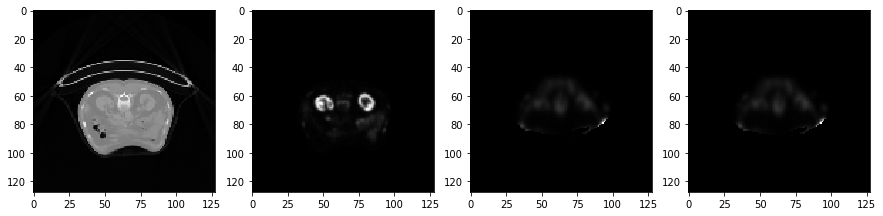

In [9]:
x = 1100
fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(ct_norm[x], cmap="gray")
axes[1].imshow(pet_norm[x], cmap="gray")
axes[2].imshow(dose[x], cmap="gray")
axes[3].imshow(dose_norm[x], cmap="gray")

In [12]:
np.sum(np.isnan(ct_norm))

0